In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [43]:
all_africa = pd.read_csv('data/all_africa_southsudan.csv')

In [44]:
all_africa.head()

,title,date,paragraphs,publisher
0,South Sudan: A Former Child Soldier Fights to ...,2021-02-12,"Sara, who was abducted at age 12, spent two ye...",Thomson Reuters Foundation (London)
1,South Sudan: #budget2019 - Will It Lead to Mor...,2019-02-21,Legal claims against the department now amount...,Bhekisisa (Johannesburg)
2,South Sudan: Retired NBA Star Elected Basketba...,2019-11-25,Former NBA star Luol Ajou Deng has been electe...,The East African (Nairobi)
3,"South Sudan - Political Violence On the Rise, ...",2022-02-11,UN human rights experts have warned of increas...,UN News Service
4,South Sudan: S. Sudan Receives First Astrazene...,2021-03-25,"Juba — South Sudan on Thursday received 132,00...",The East African (Nairobi)


In [45]:
all_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       18226 non-null  object
 1   date        18226 non-null  object
 2   paragraphs  18226 non-null  object
 3   publisher   18226 non-null  object
dtypes: object(4)
memory usage: 569.7+ KB


In [46]:
all_africa.describe()

,title,date,paragraphs,publisher
count,18226,18226,18226,18226
unique,18226,3395,18191,274
top,South Sudan: A Former Child Soldier Fights to ...,2013-12-18,Juba — South Sudan President Salva Kiir has re...,Sudan Tribune
freq,1,53,2,4712


# Explore Article lengths

In [47]:
all_africa['length'] = all_africa['paragraphs'].apply(lambda x: len(str(x).split()))

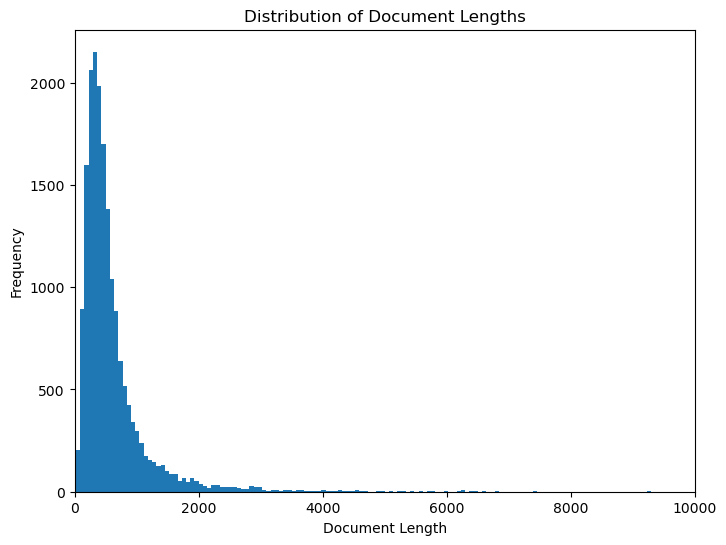

In [48]:
document_lengths = all_africa['length']

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(document_lengths, bins=500)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.xlim(0,10000)
plt.show()

### how many articles are longer than 4000 words

In [49]:
len(all_africa[all_africa['length']>=4000])

143

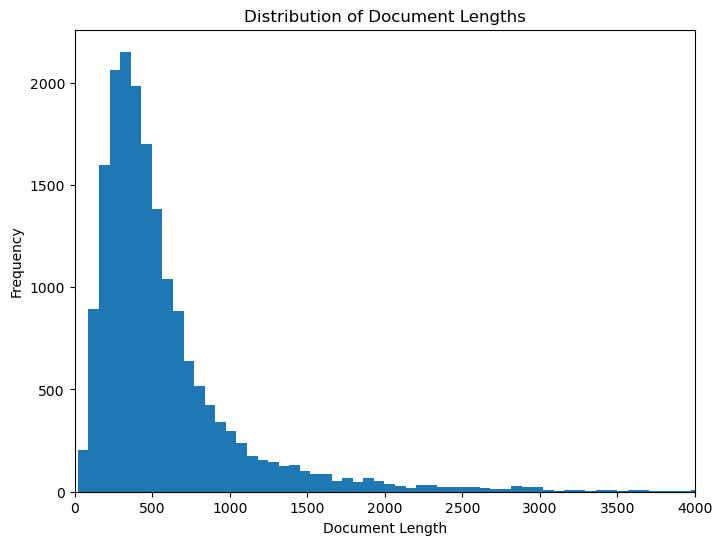

In [50]:
document_lengths = all_africa['length']

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(document_lengths, bins=500)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.xlim(0,4000)
plt.show()

In [51]:
all_africa[all_africa['length']<=50].paragraphs

6        South Sudan President Salva Kiir has appointed...
1350     Khartoum — The South Sudan State Vice-Presiden...
2088     Khartoum — President of the Republic. Field Ma...
2452     South Sudan has now been admitted as the 6th c...
2534     Khartoum — The President of South Sudan, Salva...
2820     Joseph Afandi, a journalist with the El Tabeer...
2880     Juba — Over the past month, insecurity and lac...
3371     Juba, South Sudan — Relative calm returned in ...
3708     Attached is the full text of the reunification...
3829     Beijing — Foreign Minister of South Sudan Barn...
3995     Addis Ababa — The AU has issued a communiqué o...
4117     Juba, South Sudan — Conflict related displacem...
4982     On May 15, 2014, Special Representative on Afr...
5778     President Uhuru Kenyatta is today on a one day...
6153     Kenyans visiting South Sudan will no longer ha...
6964     At least 60 soldiers are said to Have been kil...
7032     In a phone call, Interim President Adli Mansou.

# explore article numbers over time

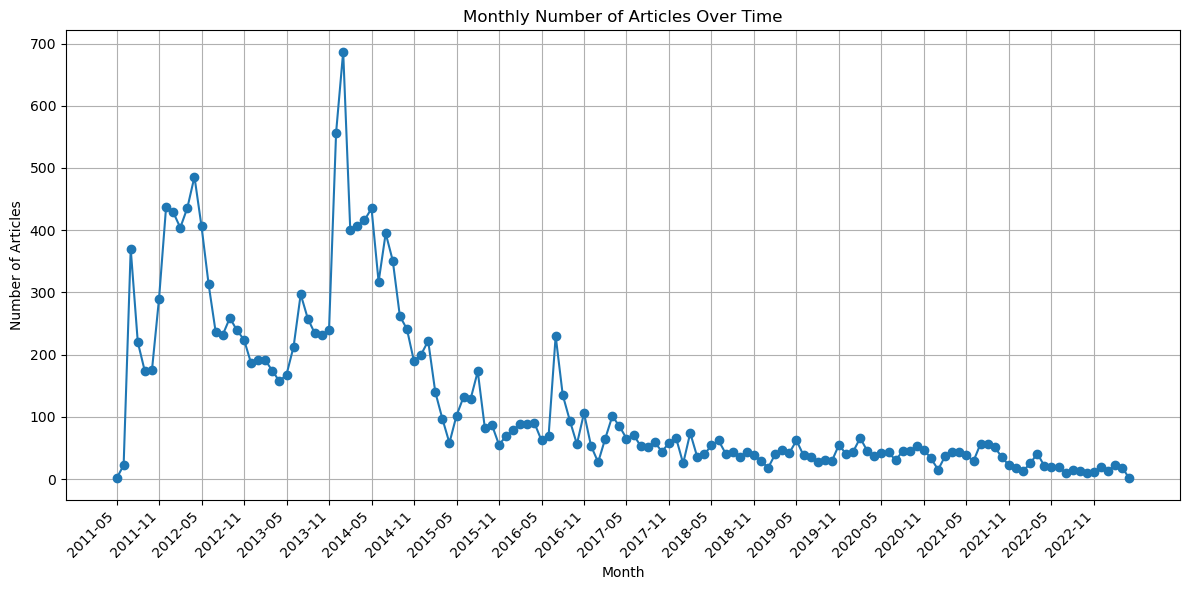

In [52]:
all_africa['date'] = pd.to_datetime(all_africa['date'])

# Group the data by month and count the number of articles published each month
grouped = all_africa.groupby(all_africa['date'].dt.to_period('M'))['title'].count()

# Convert the 'Period' index to a string representation
grouped.index = grouped.index.strftime('%Y-%m')

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Monthly Number of Articles Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)

# Optionally, you can format the x-axis to show months nicely
x_ticks = np.arange(0, len(grouped.index), 6)
plt.xticks(x_ticks, grouped.index[x_ticks], rotation=45, ha='right')

plt.tight_layout()

# what occured in 2014?

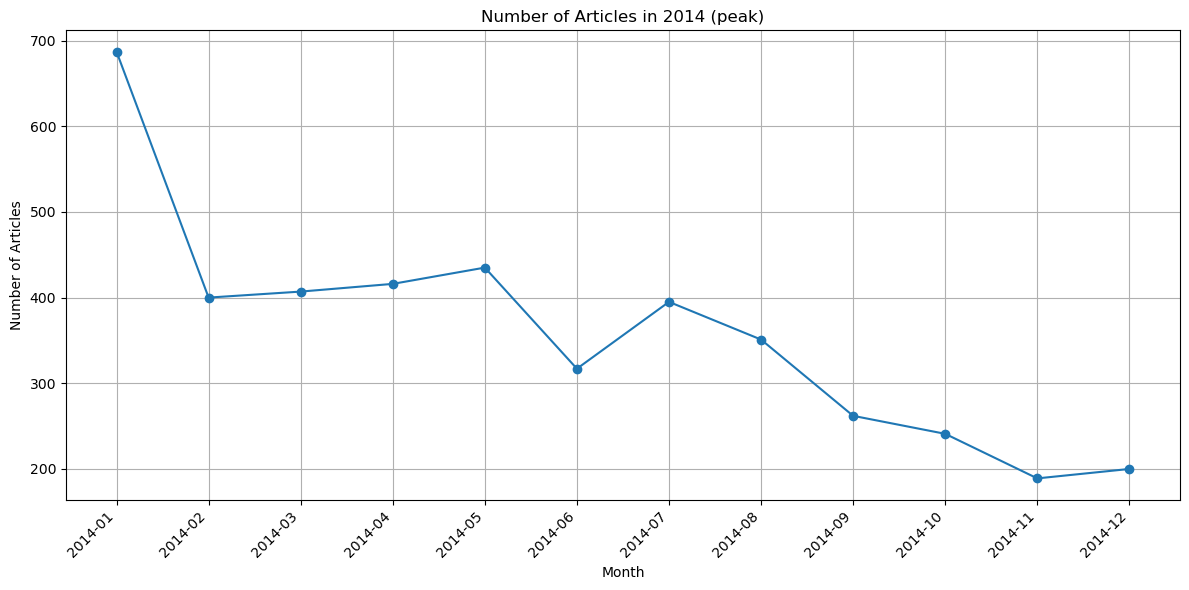

In [53]:
all_africa['date'] = pd.to_datetime(all_africa['date'])

# Filter the data for the year 2014
all_africa_2014 = all_africa[all_africa['date'].dt.year == 2014]

# Group the data by month and count the number of articles published each month
grouped = all_africa_2014.groupby(all_africa['date'].dt.to_period('M'))['title'].count()
grouped.index = grouped.index.strftime('%Y-%m')

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Number of Articles in 2014 (peak)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)

x_ticks = np.arange(0, len(grouped.index), 1)
plt.xticks(x_ticks, grouped.index[x_ticks], rotation=45, ha='right')

plt.tight_layout()

# Exploring Food_Crises_Cleaned

In [72]:
df = pd.read_csv("data/food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
print(len(df['district'].unique()))
df.set_index(["date", "district"], inplace=True) # Set index

78


### not every row has an ipc score

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12324 entries, (Timestamp('2007-01-01 00:00:00'), 'Bor') to (Timestamp('2020-02-01 00:00:00'), 'Malakal')
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          12324 non-null  object 
 1   district_code    12324 non-null  int64  
 2   centx            12324 non-null  float64
 3   centy            12324 non-null  float64
 4   year_month       12324 non-null  object 
 5   year             12324 non-null  int64  
 6   month            12324 non-null  int64  
 7   ipc              3042 non-null   float64
 8   ha               2184 non-null   float64
 9   ndvi_mean        12324 non-null  float64
 10  ndvi_anom        12324 non-null  float64
 11  rain_mean        12324 non-null  float64
 12  rain_anom        12324 non-null  float64
 13  et_mean          12324 non-null  float64
 14  et_anom          12324 non-null  float64
 15  count_violence   12324 n

In [71]:
df.describe()

,district_code,centx,centy,year,month,ipc,ha,ndvi_mean,ndvi_anom,rain_mean,...,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
count,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,3042.000000,2184.000000,12324.000000,12324.000000,12324.000000,...,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000
mean,112.500000,30.552041,7.325735,2013.088608,6.436709,2.124918,0.125458,0.523914,102.777150,13.410813,...,13.922836,1.098669,0.543492,3.220789,13.890655,8109.035212,18.570146,147039.099666,33427.480308,80.555837
std,22.515723,2.063909,1.927968,3.799521,3.475977,0.896948,0.331313,0.173015,10.318057,12.174414,...,12.385726,3.419724,1.805653,37.882633,22.856678,8116.418198,14.369645,101589.906878,51714.447306,10.765849
min,74.000000,25.589390,3.737241,2007.000000,1.000000,1.000000,0.000000,0.181902,62.629560,0.000009,...,0.000273,-12.117810,0.000000,0.000000,0.459595,757.785500,0.032678,11352.160000,2787.772000,58.213330
25%,93.000000,29.130190,5.460567,2010.000000,3.000000,1.000000,0.000000,0.364779,97.583780,1.080134,...,1.587718,-0.632700,0.000000,0.000000,1.032964,4419.444000,6.354869,75670.000000,8429.583000,71.411760
50%,112.500000,30.584770,7.558543,2013.000000,6.000000,2.000000,0.000000,0.540265,101.956000,11.668220,...,11.349735,0.329042,0.000000,0.000000,2.108440,5881.470500,16.874360,123093.000000,15014.300000,85.683480
75%,132.000000,32.210300,8.930423,2016.000000,9.000000,3.000000,0.000000,0.675034,107.021850,23.610402,...,24.470100,3.122106,0.000000,0.000000,15.723220,9237.169000,28.638140,185184.900000,40366.550000,89.581820
max,151.000000,34.606250,11.362640,2020.000000,12.000000,5.000000,1.000000,0.852260,183.192100,49.343280,...,47.904190,17.113410,57.000000,2394.000000,139.999100,62296.580000,68.842480,984111.300000,341473.800000,93.459460


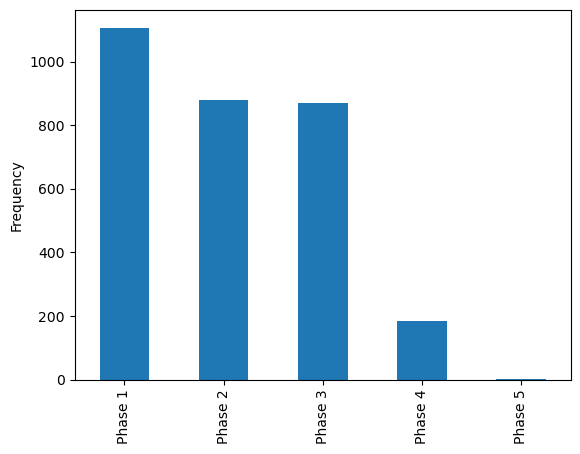

In [68]:
ax = df["ipc"].value_counts().plot(kind="bar") # Initialize barplot of fews_ipc counts
ax.set_xticklabels(["Phase {}".format(i) for i in range(1, 6)]) # Label the phases
ax.set_ylabel('Frequency'); # Set y label

In [70]:
df.reset_index()[["ipc", "district"]]

,ipc,district
0,NaN,Bor
1,NaN,Bor
2,NaN,Bor
3,NaN,Bor
4,NaN,Bor
...,...,...
12319,3.0,Malakal
12320,NaN,Malakal
12321,NaN,Malakal
12322,NaN,Malakal


In [129]:

df.dropna(subset=['ipc'], inplace=True)

for month in df['year_month'].unique():
    data_for_month = df[df['year_month'] == month].reset_index()

    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

    ax = world.plot(color="white", edgecolor="black") # Plot world map

    # Bound map to south sudan
    ax.set_xlim(20, 40)
    ax.set_ylim(3, 13)

    gdf = gpd.GeoDataFrame(data_for_month, geometry=gpd.points_from_xy(data_for_month["centx"], data_for_month["centy"])) # Initialize GeoDataFrame

    # Calculate mean ipc per administration
    mean_ipc = (
        data_for_month.reset_index()[["ipc", "district"]]
        .groupby("district")
        .mean()
        .rename(columns={"ipc": "mean_ipc"})
    )

    # Plot mean ipc per administration on map
    gdf.merge(mean_ipc, on="district").plot(
        column="mean_ipc", ax=ax, legend=True, cmap="OrRd"
    )

    # Set plot title
    ax.set_title(f"Mean IPC  in {month} per district in South Sudan");
    plt.show()

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world
c:\Users\pthie\anaconda3\Lib\site-packages\geopandas\plotting.py:675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

C:\Users\pthie\AppData\Local\Temp\ipykernel_11600\1481617452.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


<IPython.core.display.Javascript object>

In [128]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib ipympl